# Data augmentation analysis

## Data import

Load data from OpenML

In [1]:
from utils import data_import, data_augmentation

In [2]:
import imageio
import numpy as np
from sklearn.datasets import fetch_openml
from matplotlib import pyplot as plt
%matplotlib inline

import sys  

reload(sys)  
sys.setdefaultencoding('utf8')

In [3]:
X, y = fetch_openml('Fashion-MNIST', return_X_y=True)
selected_class = '4'
image_size = (28,28)
proportion = 0.2
aug_type = "rotate"

In [4]:
np.unique(y, return_counts=True)

(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object),
 array([7000, 7000, 7000, 7000, 7000, 7000, 7000, 7000, 7000, 7000]))

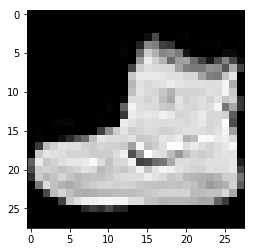

In [5]:
image = np.resize(X[0], image_size)
plt.imshow(image, cmap='gray')
plt.show()

Generate balanced dictionary from the fetched data

In [6]:
d_balanced = data_import.generate_balanced_dictionary(X,y)
d_balanced, d_test = data_import.train_test_split_dictionary(d_balanced)

In [7]:
X0, y0 = data_import.lists_from_dict(d_balanced)

Generate unbalanced dictionary by reducing the `selected_class` examples to its `proportion`.

In [8]:
d_unbalanced, _ = data_import.reduce_class_samples(d_balanced, 
                                                label_key=selected_class, 
                                                proportion=proportion)

Label sample distribution in the unbalanced data

In [9]:
X1, y1 = data_import.lists_from_dict(d_unbalanced)
np.unique(y1, return_counts=True)

(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='|S1'),
 array([5600, 5600, 5600, 5600, 1120, 5600, 5600, 5600, 5600, 5600]))

## Data augmentation

Generate augmentation with [Augmentor](https://github.com/mdbloice/Augmentor). We have to save the selected images to file (PNG lossless) and load back the augmented images

In [10]:
data_augmentation.remove_directory("augment/")

In [11]:
data_augmentation.save_label_to_file(d_unbalanced,selected_class,image_size)

1120

The number of required new images is the difference between the balanced and the unbalanced

In [12]:
missing_image_num = len(d_balanced[selected_class]) - len(d_unbalanced[selected_class])

In [13]:
data_augmentation.generate_augmented_data(missing_image_num, aug_type)

In [14]:
d_augmented= data_augmentation.load_augmented_data(d_unbalanced, selected_class, aug_type)

In [15]:
X2, y2 = data_import.lists_from_dict(d_augmented)
np.unique(y2, return_counts=True)

(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='|S1'),
 array([5600, 5600, 5600, 5600, 5600, 5600, 5600, 5600, 5600, 5600]))

In [16]:
X_test_selected_class = d_test.pop(selected_class, None)
y_test_selected_class = [selected_class]*len(X_test_selected_class)

In [17]:
X_test, y_test = data_import.lists_from_dict(d_test)
np.unique(y_test, return_counts=True)

(array(['0', '1', '2', '3', '5', '6', '7', '8', '9'], dtype='|S1'),
 array([1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400]))

## Models

In [18]:
from sklearn.linear_model import SGDClassifier as SGD
from sklearn.svm import SVC, LinearSVC

In [31]:
sgd = SGD(loss="log", max_iter=100)

In [32]:
sgd.fit(X0,y0)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=100,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [33]:
sgd.score(X_test,y_test)

0.8392063492063492

In [34]:
sgd.score(X_test_selected_class, y_test_selected_class)

0.555

In [35]:
sgd_unbalanced = SGD(loss="log", max_iter=100)

In [36]:
sgd_unbalanced.fit(X1,y1)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=100,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [37]:
sgd_unbalanced.score(X_test,y_test)

0.8296031746031746

In [38]:
sgd_unbalanced.score(X_test_selected_class, y_test_selected_class)

0.5971428571428572

In [39]:
sgd_augmented = SGD(loss="log", max_iter=100)

In [40]:
sgd_augmented.fit(X2,y2)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=100,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [41]:
sgd_augmented.score(X_test, y_test)

0.8526190476190476

In [42]:
sgd_augmented.score(X_test_selected_class, y_test_selected_class)

0.16

In [ ]:
svc = LinearSVC()
svc.fit(X0, y0)
print(svc.score(X_test, y_test))
print(svc.score(X_test_selected_class, y_test_selected_class))

In [ ]:
svc = LinearSVC()
svc.fit(X1, y1)
print(svc.score(X_test, y_test))
print(svc.score(X_test_selected_class, y_test_selected_class))

In [ ]:
svc = LinearSVC()
svc.fit(X2, y2)
print(svc.score(X_test, y_test))
print(svc.score(X_test_selected_class, y_test_selected_class))